In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
df = pd.read_csv('train.csv')

# Explore the dataset
print("Dataset summary:")
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display information about the dataset



Dataset summary:
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    flo

In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<ipython-input-6-aa9eda18f843>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], kde=True)


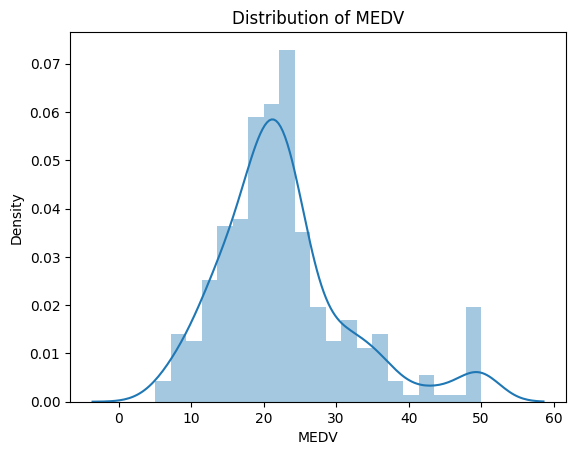

In [ ]:
# Visualize the distribution of the target variable 'MEDV'
sns.distplot(df['medv'], kde=True)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Density')
plt.show()

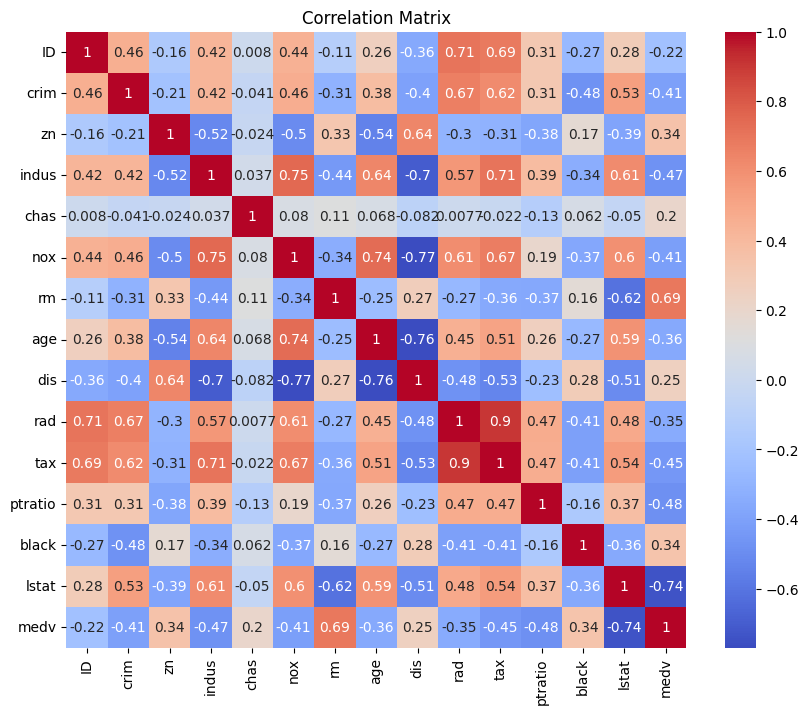

In [ ]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


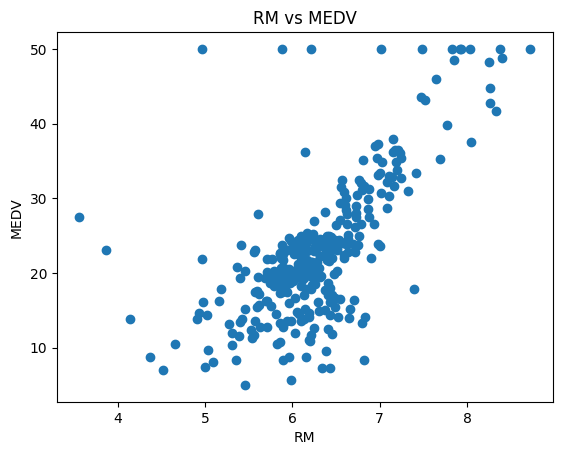

In [ ]:
# Visualize the scatter plot between 'RM' and 'MEDV'
plt.scatter(df['rm'], df['medv'])
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()


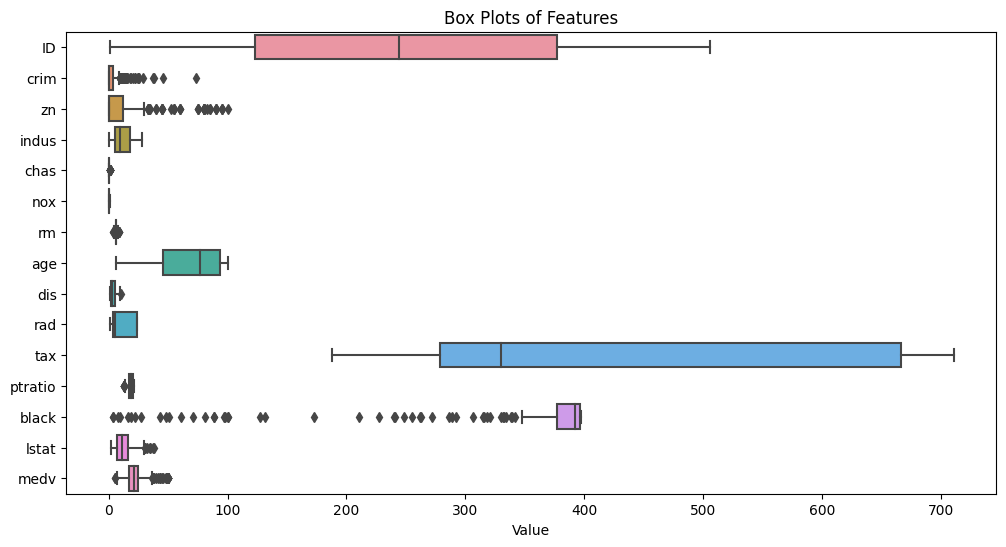

In [ ]:
# Visualize the box plots of each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Features')
plt.xlabel('Value')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (266, 14) (266,)
Testing set shape: (67, 14) (67,)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and the target variable (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print the first few rows of the scaled DataFrame
print(df_scaled.head())


         ID      crim        zn     indus     chas       nox        rm  \
0 -1.693014 -0.456875  0.322906 -1.285631 -0.25278 -0.166787  0.440154   
1 -1.686241 -0.454016 -0.472123 -0.604425 -0.25278 -0.767928  0.221060   
2 -1.672694 -0.453327 -0.472123 -1.304235 -0.25278 -0.863762  1.041952   
3 -1.665921 -0.448330 -0.472123 -1.304235 -0.25278 -0.863762  1.253933   
4 -1.652374 -0.445709  0.079980 -0.489936 -0.25278 -0.288758 -0.360821   

        age       dis      rad       tax   ptratio     black     lstat  
0 -0.107736  0.192133 -0.98907 -0.664062 -1.465171  0.432990 -1.067772  
1  0.379963  0.635528 -0.87451 -0.980620 -0.301616  0.432990 -0.478299  
2 -0.798347  1.189127 -0.75995 -1.097863  0.117264  0.406733 -1.356840  
3 -0.499320  1.189127 -0.75995 -1.097863  0.117264  0.432990 -1.018177  
4 -0.057898  0.935505 -0.53083 -0.576130 -1.511713  0.417953 -0.012106  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error: 23.41170182659855
Mean Absolute Error (MAE): 3.6594858160279635


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, y_pred)


print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.7398653051224333
